In [117]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from utils.plotting_BGM import plot_results, plot_boundaries
from utils.feature_reduction import *

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [118]:
df = pd.read_csv('data/ex.csv')

dataset = df.copy()

In [119]:
X = dataset.values
x_cords = dataset['x'].values
y_cords = dataset['y'].values

def plot_dataset(x, y):
  plt.scatter(x, y, label='Data')

  plt.xlim(np.amin(x) - np.ptp(x*0.05),
             np.amax(x) + np.ptp(x*0.05))
  plt.ylim(np.amin(y) - np.ptp(y*0.05),
             np.amax(y) + np.ptp(y*0.05))

  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

# plot_dataset(x, y)

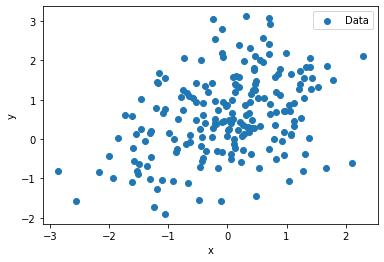

In [120]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y_cords, test_size=0.20)

plot_dataset(x_test[:,0], x_test[:,1])

X = x_test


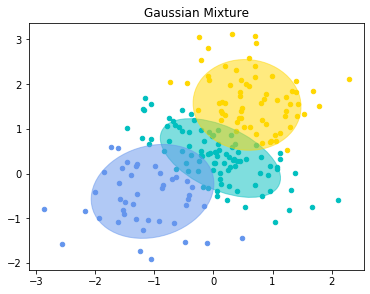

In [121]:
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)

y_pred = gmm.predict(X)

plot_results(X, y_pred, gmm.means_, gmm.covariances_, 0, 
                'Gaussian Mixture')

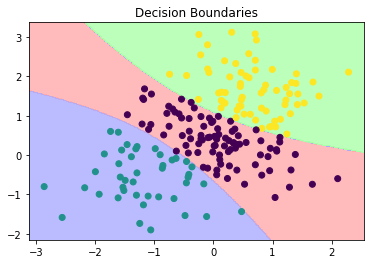

In [122]:
plot_boundaries(X, y_pred, gmm, "Decision Boundaries")

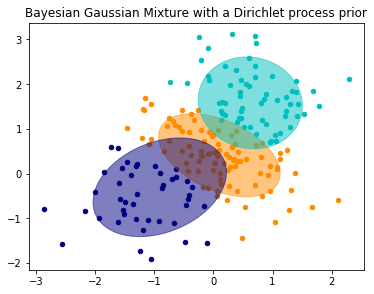

In [123]:
# Fit a Dirichlet process Gaussian mixture using five components
bgm = BayesianGaussianMixture(n_components=3, covariance_type='full').fit(X)

y_pred = bgm.predict(X)

plot_results(X, bgm.predict(X), bgm.means_, bgm.covariances_, 1,
                'Bayesian Gaussian Mixture with a Dirichlet process prior')

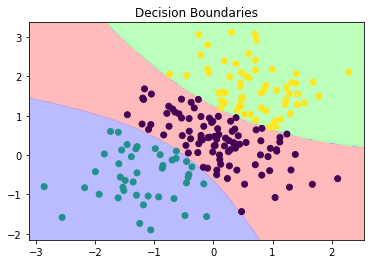

In [124]:
plot_boundaries(X, y_pred, bgm, "Decision Boundaries")